In [11]:
import fitz  # PyMuPDF
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import nltk
import re

In [12]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/carlos/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
def extraer_texto_pdf(path):
    doc = fitz.open(path)
    return " ".join([page.get_text() for page in doc])

In [27]:
verbos_clave = [
    "cómo", "dónde", "puedo", "consultar", "registrar", "cambiar",
    "agregar", "eliminar", "descargar", "ver", "realizar", "modificar", "solicitar"
]

In [14]:
manual_text = extraer_texto_pdf("./ManualdeUsuario.pdf")
dictado_text = extraer_texto_pdf("./Funcionalidad MiCoto.pdf")
texto_total = manual_text + "\n" + dictado_text

In [15]:
texto_total

' \n \nManual de Usuario \n \n \n \n \n \n \n \n \n \n \nwww.micoto.mx \n  \n \nComo ingresar fácilmente a tu condominio  \nPreviamente se te hará llegar una invitación para que nos ayudes \nproporcionando tus datos para crear tu usuario y contraseña o bien tu \nadministrador cargara en nuestro portal los datos de tu condómino. \nEl administrador de tu condominio se pondrá en contacto contigo directamente o te hará \nllegar una invitación vía correo electrónico para que formes parte de la comunidad \nMiCoto, una vez que esto pase te solicitaremos tus datos generales para así crear una \nnueva cuanta y acceso único. \nPaso 1 – ingresa al sitio www. micoto.mx \nYa sea que ingreses directamente desde nuestra app (disponible en Google play y app \nstore) o mediante a nuestra plataforma web puedes tener el 100% de la funcionalidad de \nesta herramienta. \n \nNos encuentras como MiCoto.mx  \n \nDentro de nuestra plataforma web www. MiCoto.mx tienes que seleccionar log in para \ningresar tu u

In [16]:
texto_limpio = re.sub(r"[^a-zA-ZáéíóúüñÁÉÍÓÚÑ\s]", "", texto_total.lower())

In [17]:
texto_limpio

' \n \nmanual de usuario \n \n \n \n \n \n \n \n \n \n \nwwwmicotomx \n  \n \ncomo ingresar fácilmente a tu condominio  \npreviamente se te hará llegar una invitación para que nos ayudes \nproporcionando tus datos para crear tu usuario y contraseña o bien tu \nadministrador cargara en nuestro portal los datos de tu condómino \nel administrador de tu condominio se pondrá en contacto contigo directamente o te hará \nllegar una invitación vía correo electrónico para que formes parte de la comunidad \nmicoto una vez que esto pase te solicitaremos tus datos generales para así crear una \nnueva cuanta y acceso único \npaso   ingresa al sitio www micotomx \nya sea que ingreses directamente desde nuestra app disponible en google play y app \nstore o mediante a nuestra plataforma web puedes tener el  de la funcionalidad de \nesta herramienta \n \nnos encuentras como micotomx  \n \ndentro de nuestra plataforma web www micotomx tienes que seleccionar log in para \ningresar tu usuario y contraseña

In [18]:
stop_words = set(stopwords.words('spanish'))
tokens = [word for word in texto_limpio.split() if word not in stop_words and len(word) > 3]
texto_filtrado = " ".join(tokens)

In [19]:
texto_filtrado

'manual usuario wwwmicotomx ingresar fácilmente condominio previamente hará llegar invitación ayudes proporcionando datos crear usuario contraseña bien administrador cargara portal datos condómino administrador condominio pondrá contacto contigo directamente hará llegar invitación correo electrónico formes parte comunidad micoto pase solicitaremos datos generales crear nueva cuanta acceso único paso ingresa sitio micotomx ingreses directamente disponible google play store mediante plataforma puedes tener funcionalidad herramienta encuentras micotomx dentro plataforma micotomx seleccionar ingresar usuario contraseña paso proporciona nombre usuario pasword sitio dentro aplicación dentro podrás ingresar menú usuario dando click cada opciones encuentras izquierda versión computadora parte superior izquierda home sección home veras información interés general recolección basura anuncios condominio teléfonos emergencia cuenta cuota condominal sección configurable dependiendo necesidades cond

In [28]:
frases_detectadas = []
for linea in texto_filtrado.split("\n"):
    for verbo in verbos_clave:
        if verbo in linea.lower():
            frases_detectadas.append(linea.strip())
            break

In [29]:
df_intenciones = pd.DataFrame({"Frase clave": frases_detectadas})

# --- 3. WordCloud solo con frases clave ---
texto_frases = " ".join(frases_detectadas)

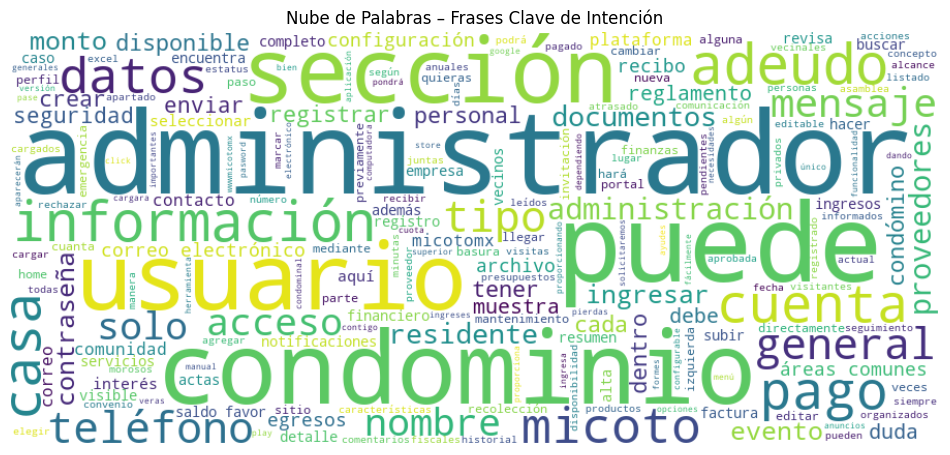

In [30]:
wc_frases = WordCloud(width=900, height=400, background_color="white", colormap='viridis')
wc_frases.generate(texto_frases)

plt.figure(figsize=(12, 6))
plt.imshow(wc_frases, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras – Frases Clave de Intención")
plt.show()

In [32]:
stop_words = list(stopwords.words('spanish')) 
vectorizer = CountVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(frases_detectadas)
frecuencias = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()).T
frecuencias.columns = ['frecuencia']
frecuencias = frecuencias.sort_values(by='frecuencia', ascending=False).head(20)


/var/folders/wj/697d4ndd5cnd828k3szpyr0c0000gn/T/ipykernel_42656/3631813858.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencias['frecuencia'], y=frecuencias.index, palette='viridis')


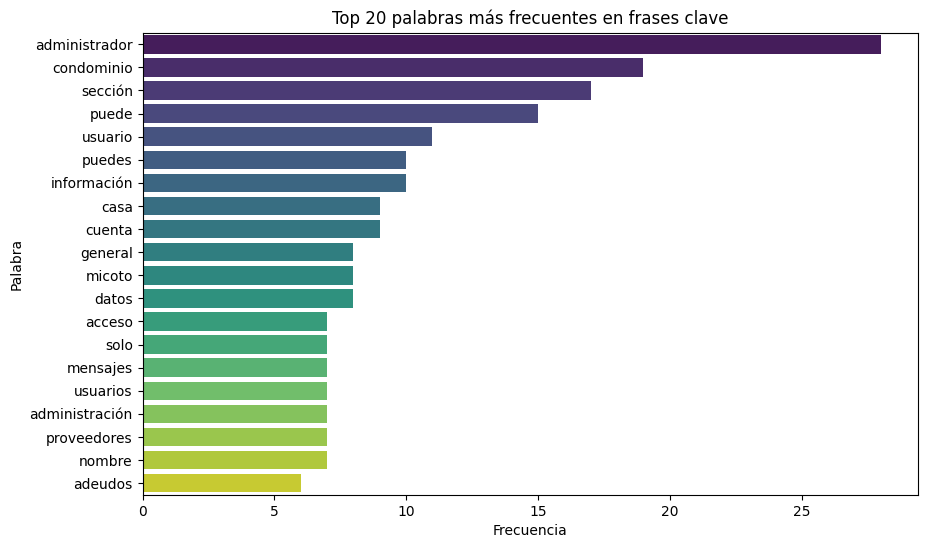

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x=frecuencias['frecuencia'], y=frecuencias.index, palette='viridis')
plt.title("Top 20 palabras más frecuentes en frases clave")
plt.xlabel("Frecuencia")
plt.ylabel("Palabra")
plt.show()

In [35]:
vectorizer2 = CountVectorizer(ngram_range=(2, 2), stop_words=stop_words)
X2 = vectorizer2.fit_transform(frases_detectadas)
bigrama_freq = pd.DataFrame(X2.toarray(), columns=vectorizer2.get_feature_names_out()).T
bigrama_freq.columns = ['frecuencia']
bigrama_freq = bigrama_freq.sort_values(by='frecuencia', ascending=False).head(10)


/var/folders/wj/697d4ndd5cnd828k3szpyr0c0000gn/T/ipykernel_42656/3049583161.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bigrama_freq['frecuencia'], y=bigrama_freq.index, palette='magma')


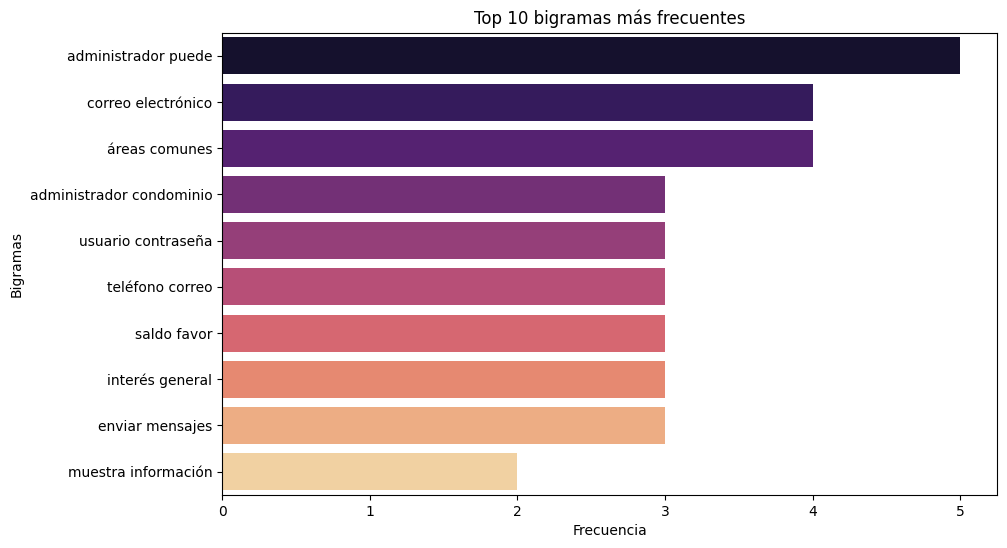

In [36]:
# Gráfico de bigramas
plt.figure(figsize=(10, 6))
sns.barplot(x=bigrama_freq['frecuencia'], y=bigrama_freq.index, palette='magma')
plt.title("Top 10 bigramas más frecuentes")
plt.xlabel("Frecuencia")
plt.ylabel("Bigramas")
plt.show()